# Neural Network Models

First we need to load all the packages necessary for this notebook. In order to install the packages run pip install requirements.txt

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import seaborn as sns

Next we get the data using the environment variable ```RESEARCH_DATA_PATH``` which should direct to the data folder of this project

In [ ]:
DATA_PATH = os.environ.get("RESEARCH_DATA_PATH")

In [3]:
#MONTHLY DATA
X_mef_m = pd.read_csv(f'{DATA_PATH}/processed/mef_monthly_data_processed.csv')
X_mai_m = pd.read_csv(f'{DATA_PATH}/processed/mai_monthly_data_processed.csv')
y_mkt_m = pd.read_csv(f'{DATA_PATH}/processed/mkt_monthly_data_processed.csv')

X_mef_m['date'] = pd.to_datetime(X_mef_m['date'])
X_mai_m['date'] = pd.to_datetime(X_mai_m['date'])
y_mkt_m['date'] = pd.to_datetime(y_mkt_m['date'])

# Drop the 'date' column from each dataset
X_mef_m = X_mef_m.drop('date', axis=1)
X_mai_m = X_mai_m.drop('date', axis=1)
y_mkt_m = y_mkt_m.drop('date', axis=1)

X_mef_m = X_mef_m.values
X_mai_m = X_mai_m.values
y_mkt_m = y_mkt_m.values

#DAILY DATA
X_mef_d = pd.read_csv(f'{DATA_PATH}/processed/mef_daily_data_processed.csv')
X_mai_d = pd.read_csv(f'{DATA_PATH}/processed/mai_daily_data_processed.csv')
y_mkt_d = pd.read_csv(f'{DATA_PATH}/processed/mkt_daily_data_processed.csv')

X_mef_d['date'] = pd.to_datetime(X_mef_d['date'])
X_mai_d['date'] = pd.to_datetime(X_mai_d['date'])
y_mkt_d['date'] = pd.to_datetime(y_mkt_d['date'])

# Drop the 'date' column from each dataset
X_mef_d = X_mef_d.drop('date', axis=1)
X_mai_d = X_mai_d.drop('date', axis=1)
y_mkt_d = y_mkt_d.drop('date', axis=1)

X_mef_d = X_mef_d.values
X_mai_d = X_mai_d.values
y_mkt_d = y_mkt_d.values

In [5]:
# Function: split data into training and test set based on the random state
def split_data(X, y, test_size, random_state):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size,random_state=random_state)
    return X_train, y_train, X_test, y_test

In [29]:
# Function: build the neural network model for MAI data

def train_neural_network_MAI(X, y):
    """
    Parameters:
    - X: MAI features
    - y: Target variable

    Returns:
    - Trained model
    - Model training history
    """

    # the best number of layers, dropout layers, the best number of units of a layer have been selected
    model = keras.Sequential([
    layers.Dense(64, activation=keras.layers.ELU(),input_dim=8),
    Dropout(0.3),
    layers.Dense(32, activation=keras.layers.ELU()),
    Dropout(0.5),
    layers.Dense(1)  # Output layer with 1 neuron for numerical output
    ])

    # Compile the model
    # the best optimizer and learning rate have been selected
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])

    # Train the model
    # the best number of epochs and batch_size have been selected
    history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

    # Plot training and validation accuracy over epochs
    # plt.plot(history.history['loss'], label='Training MSE')
    # plt.plot(history.history['val_loss'], label='Validation MSE')
    # plt.xlabel('Epoch')
    # plt.ylabel('Accuracy')
    # plt.legend()
    # plt.show()

    mse_values = history.history['loss']
    mse_values_val = history.history['val_loss']

    avg_RMSE_train = np.mean([mse_value ** 0.5 for mse_value in mse_values])
    avg_RMSE_test = np.mean([mse_value_val ** 0.5 for mse_value_val in mse_values_val])

    return model, history, avg_RMSE_train, avg_RMSE_test

In [42]:
# Function: build the neural network model for MEF data

def train_neural_network_MEF(X, y):
    """
    Parameters:
    - X: MEF features
    - y: Target variable

    Returns:
    - Trained model
    - Model training history
    """

    # the best number of layers, dropout layers, the best number of units of a layer have been selected
    model = keras.Sequential([
    layers.Dense(64, activation=keras.layers.ELU(),input_dim=14),
    Dropout(0.3),
    layers.Dense(32, activation=keras.layers.ELU()),
    Dropout(0.5),
    layers.Dense(1)  # Output layer with 1 neuron for numerical output
    ])

    # Compile the model
    # the best optimizer and learning rate have been selected
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])

    # Train the model
    # the best number of epochs and batch_size have been selected
    history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

    # Plot training and validation accuracy over epochs
    # plt.plot(history.history['loss'], label='Training MSE')
    # plt.plot(history.history['val_loss'], label='Validation MSE')
    # plt.xlabel('Epoch')
    # plt.ylabel('Accuracy')
    # plt.legend()
    # plt.show()
    mse_values = history.history['loss']
    mse_values_val = history.history['val_loss']

    avg_RMSE_train = np.mean([mse_value ** 0.5 for mse_value in mse_values])
    avg_RMSE_test = np.mean([mse_value_val ** 0.5 for mse_value_val in mse_values_val])

    return model, history, avg_RMSE_train, avg_RMSE_test

In [8]:
#Function: evaluate the performance of the model and show the values in plot
def test_model(model, X_test, y_test):
    """
    Test a trained model and calculate regression metrics.

    Parameters:
    - model: Trained model
    - X_test: Testing features
    - y_test: True values for testing

    Returns:
    - Mean Squared Error (MSE)
    - Mean Absolute Error (MAE)
    - R-squared (R2) score
    """

    # Make y_pred using the trained model
    y_pred = model.predict(X_test)

    # Calculate regression metrics
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)

    # Plot predicted values and true values

    new_y_test = [value for index, value in enumerate(y_test)]
    plt.plot(new_y_test, label='True',color='blue')
    plt.plot(y_pred, label='Prediction',color='red')

    plt.xlabel('Index')
    plt.ylabel('y values')
    plt.title('True vs Pred')

    plt.legend()

    plt.show()

    return MSE, MAE, R2

Epoch 1/10
9/9 [==============================] - 4s 37ms/step - loss: 2661.5840 - mae: 39.8839 - val_loss: 3600.0452 - val_mae: 41.4520
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 2666.2380 - mae: 39.8192 - val_loss: 3600.0999 - val_mae: 41.4431
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 2665.9705 - mae: 39.8864 - val_loss: 3600.2378 - val_mae: 41.4372
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 2667.8264 - mae: 39.9155 - val_loss: 3600.3281 - val_mae: 41.4330
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 2652.0510 - mae: 39.7410 - val_loss: 3600.4128 - val_mae: 41.4269
Epoch 6/10
9/9 [==============================] - 0s 8ms/step - loss: 2663.4016 - mae: 39.7975 - val_loss: 3600.5725 - val_mae: 41.4216
Epoch 7/10
9/9 [==============================] - 0s 6ms/step - loss: 2646.6670 - mae: 39.7394 - val_loss: 3600.7778 - val_mae: 41.4179
Epoch 8/10
9/9 [==============================]

3/3 [==============================] - 0s 5ms/step


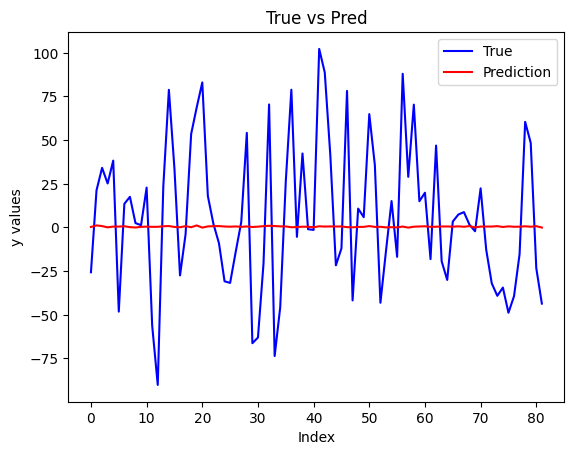

RMSE: 42.59581645501353, MAE: 34.05685718361946, R2: -0.021257957985297615


In [24]:
# Train one model on MAI monthly data
# Generate training and test data sets
X_train, y_train, X_test, y_test = split_data(X_mai_m, y_mkt_m, 0.2, 0)

# Use X_train and y_train as MAI features and target variable
trained_model, training_history, avg_RMSE_train, avg_RMSE_test = train_neural_network_MAI(X_train, y_train)

print('During training of this NN model, average training RMSE is', avg_RMSE_train, ', average validation RMSE is', avg_RMSE_test)

# Have the performance of the trained model evaluated on the test set
MSE, MAE, R2 = test_model(trained_model, X_test, y_test)
print(f'RMSE: {MSE**(1/2)}, MAE: {MAE}, R2: {R2}')

In [28]:
print(X_mai_m[1])

[1.21359223 0.60679612 0.43725404 1.56607524 2.52535437 1.43221926
 0.52202508 4.24757282]


Epoch 1/10
9/9 [==============================] - 1s 24ms/step - loss: 2682.6387 - mae: 40.2969 - val_loss: 3579.6055 - val_mae: 41.5379
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 2679.5269 - mae: 40.2391 - val_loss: 3580.0640 - val_mae: 41.5236
Epoch 3/10
9/9 [==============================] - 0s 6ms/step - loss: 2677.3289 - mae: 40.1939 - val_loss: 3580.3281 - val_mae: 41.5139
Epoch 4/10
9/9 [==============================] - 0s 7ms/step - loss: 2675.1135 - mae: 40.1558 - val_loss: 3580.6208 - val_mae: 41.5034
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 2672.8215 - mae: 40.1142 - val_loss: 3581.0945 - val_mae: 41.4911
Epoch 6/10
9/9 [==============================] - 0s 8ms/step - loss: 2670.8184 - mae: 40.0729 - val_loss: 3581.5820 - val_mae: 41.4768
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 2668.3235 - mae: 40.0204 - val_loss: 3582.2556 - val_mae: 41.4637
Epoch 8/10
9/9 [==============================]

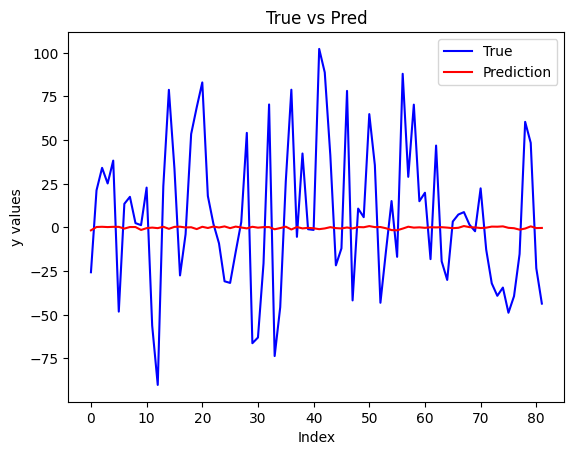

RMSE: 42.73850868598014, MAE: 34.10950707043247, R2: -0.02811166675222676
Epoch 1/10
9/9 [==============================] - 1s 25ms/step - loss: 2828.9089 - mae: 39.3274 - val_loss: 1818.5258 - val_mae: 34.9011
Epoch 2/10
9/9 [==============================] - 0s 6ms/step - loss: 2826.0745 - mae: 39.2803 - val_loss: 1817.7339 - val_mae: 34.8912
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 2823.8147 - mae: 39.2352 - val_loss: 1816.7820 - val_mae: 34.8783
Epoch 4/10
9/9 [==============================] - 0s 6ms/step - loss: 2820.6150 - mae: 39.1759 - val_loss: 1815.8691 - val_mae: 34.8647
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 2817.5239 - mae: 39.1253 - val_loss: 1815.1693 - val_mae: 34.8530
Epoch 6/10
9/9 [==============================] - 0s 6ms/step - loss: 2815.2500 - mae: 39.0766 - val_loss: 1814.5089 - val_mae: 34.8410
Epoch 7/10
9/9 [==============================] - 0s 6ms/step - loss: 2813.3450 - mae: 39.0389 - val_loss: 18

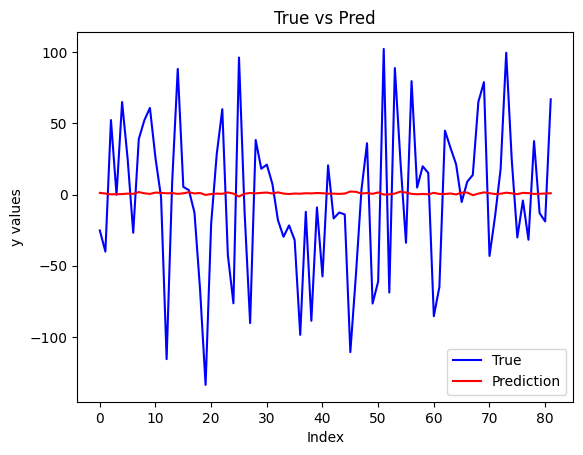

RMSE: 52.53372781349113, MAE: 41.480227875378674, R2: -0.007523024354519681
Epoch 1/10
9/9 [==============================] - 1s 21ms/step - loss: 2190.7834 - mae: 35.0772 - val_loss: 2814.4956 - val_mae: 39.9952
Epoch 2/10
9/9 [==============================] - 0s 7ms/step - loss: 2189.5608 - mae: 35.0585 - val_loss: 2815.1626 - val_mae: 39.9775
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 2188.5327 - mae: 35.0376 - val_loss: 2816.1736 - val_mae: 39.9486
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 2186.5950 - mae: 35.0105 - val_loss: 2817.1633 - val_mae: 39.9259
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 2185.1099 - mae: 34.9863 - val_loss: 2818.2632 - val_mae: 39.8975
Epoch 6/10
9/9 [==============================] - 0s 6ms/step - loss: 2183.7581 - mae: 34.9641 - val_loss: 2819.2998 - val_mae: 39.8719
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 2182.4241 - mae: 34.9366 - val_loss: 

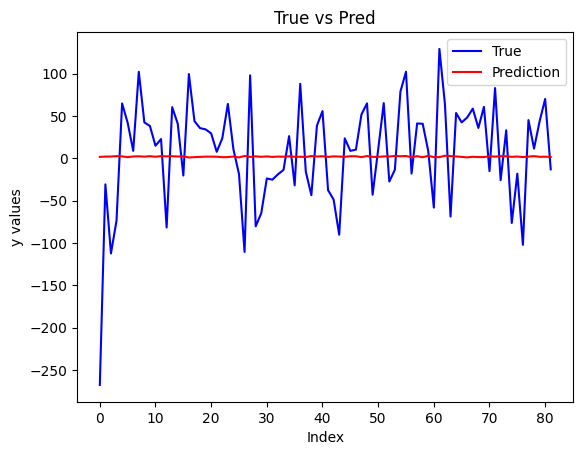

RMSE: 62.315109582075245, MAE: 49.18776508196082, R2: -0.011499093379933045
Epoch 1/10
9/9 [==============================] - 1s 34ms/step - loss: 2848.2441 - mae: 39.3724 - val_loss: 2298.2214 - val_mae: 38.3229
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 2845.9597 - mae: 39.3356 - val_loss: 2296.2664 - val_mae: 38.2847
Epoch 3/10
9/9 [==============================] - 0s 11ms/step - loss: 2844.4050 - mae: 39.3044 - val_loss: 2294.4871 - val_mae: 38.2506
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 2842.9451 - mae: 39.2761 - val_loss: 2292.6521 - val_mae: 38.2168
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 2841.3909 - mae: 39.2498 - val_loss: 2290.4995 - val_mae: 38.1772
Epoch 6/10
9/9 [==============================] - 0s 10ms/step - loss: 2839.7395 - mae: 39.2135 - val_loss: 2288.8025 - val_mae: 38.1453
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 2838.1431 - mae: 39.1859 - val_loss

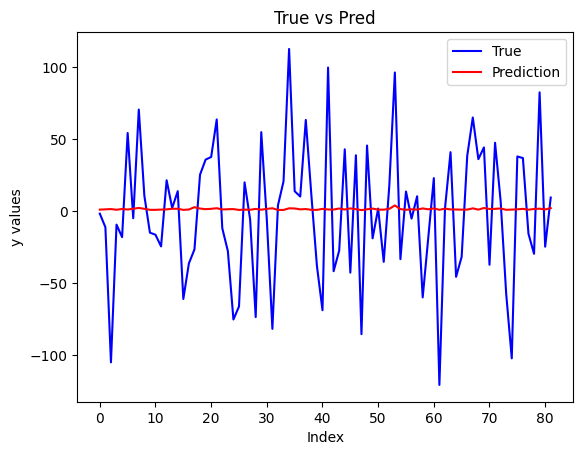

RMSE: 47.5155142638614, MAE: 37.69229256934345, R2: 0.002192277092669226
Epoch 1/10
9/9 [==============================] - 1s 22ms/step - loss: 2901.4968 - mae: 40.9132 - val_loss: 2422.7092 - val_mae: 37.8709
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 2899.9019 - mae: 40.8857 - val_loss: 2421.4343 - val_mae: 37.8545
Epoch 3/10
9/9 [==============================] - 0s 7ms/step - loss: 2899.3240 - mae: 40.8614 - val_loss: 2419.8716 - val_mae: 37.8335
Epoch 4/10
9/9 [==============================] - 0s 9ms/step - loss: 2898.0847 - mae: 40.8354 - val_loss: 2418.6404 - val_mae: 37.8169
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 2897.5151 - mae: 40.8183 - val_loss: 2417.7520 - val_mae: 37.8061
Epoch 6/10
9/9 [==============================] - 0s 6ms/step - loss: 2896.9500 - mae: 40.8013 - val_loss: 2416.6306 - val_mae: 37.7915
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 2895.9902 - mae: 40.7837 - val_loss: 241

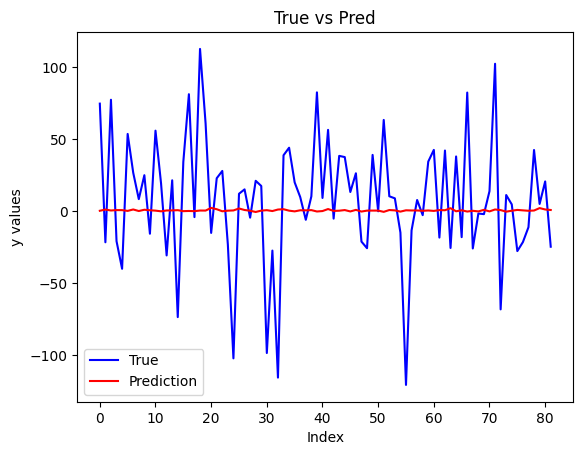

RMSE: 44.847988811117474, MAE: 33.745936718430066, R2: -0.03548097037185327
Epoch 1/10
9/9 [==============================] - 1s 25ms/step - loss: 2808.7087 - mae: 39.4818 - val_loss: 1771.2585 - val_mae: 32.8589
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 2806.6738 - mae: 39.4525 - val_loss: 1770.1116 - val_mae: 32.8306
Epoch 3/10
9/9 [==============================] - 0s 6ms/step - loss: 2804.7014 - mae: 39.4215 - val_loss: 1768.7410 - val_mae: 32.7966
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 2802.5349 - mae: 39.3904 - val_loss: 1767.4762 - val_mae: 32.7625
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 2800.7422 - mae: 39.3605 - val_loss: 1766.4788 - val_mae: 32.7347
Epoch 6/10
9/9 [==============================] - 0s 6ms/step - loss: 2799.1575 - mae: 39.3335 - val_loss: 1765.1530 - val_mae: 32.6969
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 2796.9614 - mae: 39.3029 - val_loss: 

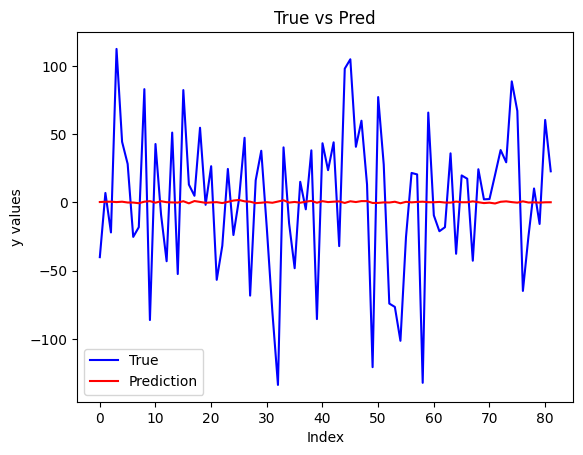

RMSE: 53.31246251965936, MAE: 42.80321098417705, R2: -0.00041333985808078566
Epoch 1/10
9/9 [==============================] - 1s 24ms/step - loss: 2285.8511 - mae: 36.8958 - val_loss: 2842.5566 - val_mae: 40.1471
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 2283.4016 - mae: 36.8563 - val_loss: 2840.9902 - val_mae: 40.1169
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 2281.7446 - mae: 36.8327 - val_loss: 2839.8352 - val_mae: 40.0941
Epoch 4/10
9/9 [==============================] - 0s 7ms/step - loss: 2280.1938 - mae: 36.8088 - val_loss: 2838.4331 - val_mae: 40.0729
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 2278.6201 - mae: 36.7818 - val_loss: 2837.0227 - val_mae: 40.0493
Epoch 6/10
9/9 [==============================] - 0s 8ms/step - loss: 2276.9072 - mae: 36.7536 - val_loss: 2835.7053 - val_mae: 40.0259
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 2275.6133 - mae: 36.7287 - val_loss:

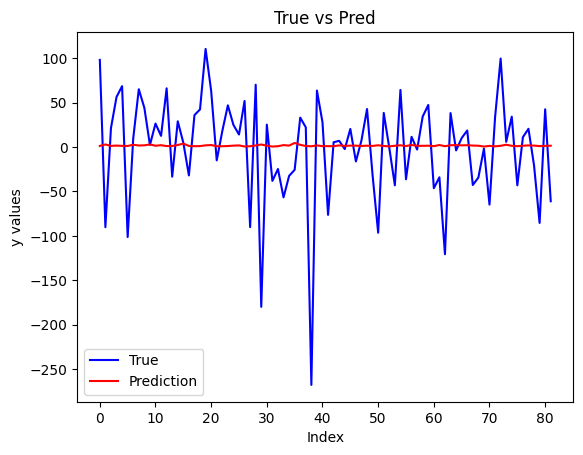

RMSE: 59.872210135578854, MAE: 43.5527427650035, R2: -0.0018314817234523773
Epoch 1/10
9/9 [==============================] - 1s 22ms/step - loss: 2319.9707 - mae: 36.4296 - val_loss: 3275.6355 - val_mae: 44.9472
Epoch 2/10
9/9 [==============================] - 0s 7ms/step - loss: 2318.6257 - mae: 36.4074 - val_loss: 3274.9836 - val_mae: 44.9329
Epoch 3/10
9/9 [==============================] - 0s 6ms/step - loss: 2317.8669 - mae: 36.3906 - val_loss: 3273.8171 - val_mae: 44.9053
Epoch 4/10
9/9 [==============================] - 0s 6ms/step - loss: 2316.5496 - mae: 36.3698 - val_loss: 3272.8279 - val_mae: 44.8791
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 2315.1504 - mae: 36.3479 - val_loss: 3271.9041 - val_mae: 44.8541
Epoch 6/10
9/9 [==============================] - 0s 9ms/step - loss: 2314.4058 - mae: 36.3276 - val_loss: 3270.8188 - val_mae: 44.8281
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 2312.8816 - mae: 36.3031 - val_loss: 

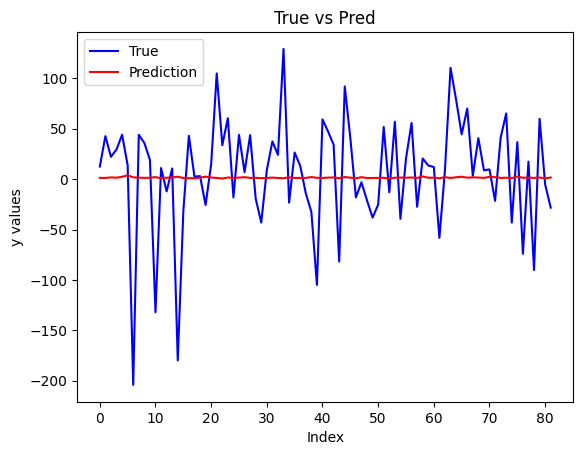

RMSE: 55.890820637068984, MAE: 41.11278179342696, R2: -0.009886135942402063
Epoch 1/10
9/9 [==============================] - 1s 25ms/step - loss: 2769.4609 - mae: 39.1316 - val_loss: 2146.2341 - val_mae: 35.5724
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 2768.9910 - mae: 39.1271 - val_loss: 2146.2122 - val_mae: 35.5727
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 2768.7678 - mae: 39.1213 - val_loss: 2145.5083 - val_mae: 35.5621
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 2768.6536 - mae: 39.1138 - val_loss: 2144.7791 - val_mae: 35.5508
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 2768.3418 - mae: 39.1057 - val_loss: 2144.2273 - val_mae: 35.5427
Epoch 6/10
9/9 [==============================] - 0s 9ms/step - loss: 2768.3726 - mae: 39.0975 - val_loss: 2142.9719 - val_mae: 35.5214
Epoch 7/10
9/9 [==============================] - 0s 6ms/step - loss: 2768.0984 - mae: 39.0853 - val_loss: 

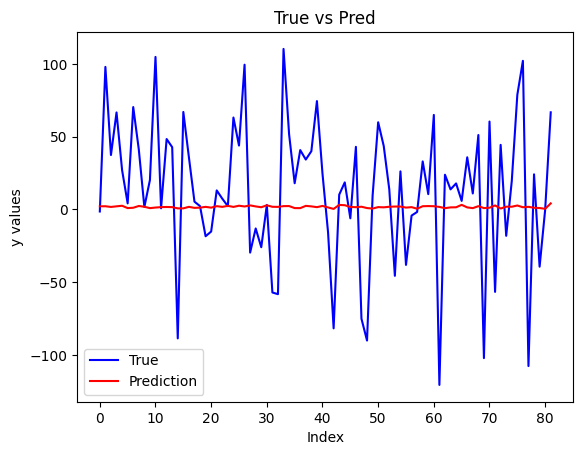

RMSE: 50.786953035146425, MAE: 39.49625283225239, R2: -0.0477067980825725
Epoch 1/10
9/9 [==============================] - 1s 34ms/step - loss: 2635.6770 - mae: 39.5471 - val_loss: 2098.1243 - val_mae: 37.8791
Epoch 2/10
9/9 [==============================] - 0s 12ms/step - loss: 2633.8635 - mae: 39.5141 - val_loss: 2096.3354 - val_mae: 37.8581
Epoch 3/10
9/9 [==============================] - 0s 10ms/step - loss: 2633.0422 - mae: 39.4961 - val_loss: 2095.6760 - val_mae: 37.8513
Epoch 4/10
9/9 [==============================] - 0s 9ms/step - loss: 2632.3271 - mae: 39.4808 - val_loss: 2094.0032 - val_mae: 37.8321
Epoch 5/10
9/9 [==============================] - 0s 9ms/step - loss: 2631.3242 - mae: 39.4587 - val_loss: 2091.9250 - val_mae: 37.8071
Epoch 6/10
9/9 [==============================] - 0s 9ms/step - loss: 2630.2495 - mae: 39.4351 - val_loss: 2090.0088 - val_mae: 37.7846
Epoch 7/10
9/9 [==============================] - 0s 10ms/step - loss: 2629.0918 - mae: 39.4137 - val_loss:

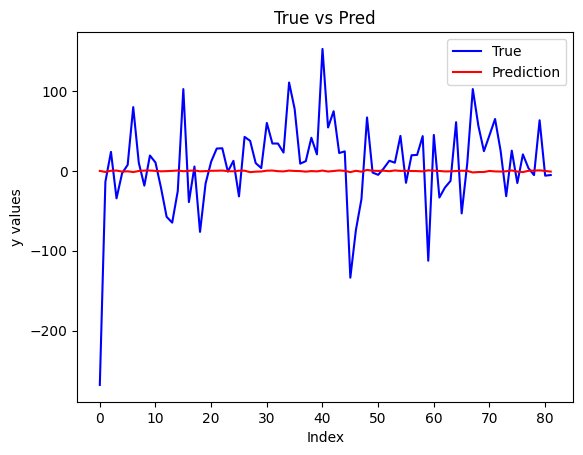

RMSE: 56.181134780389854, MAE: 38.81861561988394, R2: -0.026982719185914217
The average RMSE in the test set is 52.59944302643688


In [38]:
# Test the performance of the model on 10 different random train-test splits of MAI monthly data, and report the average RMSE.
list_RMSE_train_train=[]
list_RMSE_train_val=[]
list_RMSE=[]

for i in range(0,10):
  # Generate training and test data sets
  X_train, y_train, X_test, y_test = split_data(X_mai_m, y_mkt_m, 0.2, i)

  # Use X_train and y_train as MAI features and target variable
  trained_model, training_history, avg_RMSE_train, avg_RMSE_test = train_neural_network_MAI(X_train, y_train)
  print('During training of this NN model, average training RMSE is', avg_RMSE_train, ', average validation RMSE is', avg_RMSE_test)
  list_RMSE_train_train.append(avg_RMSE_train)
  list_RMSE_train_val.append(avg_RMSE_test)

  # Have the performance of the trained model evaluated on the test set
  MSE, MAE, R2 = test_model(trained_model, X_test, y_test)
  print(f'RMSE: {MSE**(1/2)}, MAE: {MAE}, R2: {R2}')
  list_RMSE.append(MSE**(1/2))
avg_RMSE=np.mean(list_RMSE)
print('The average RMSE in the test set is', avg_RMSE)

Text(0.5, 1.0, 'Distribution of RMSE over Iterations (MAI monthly training data)')

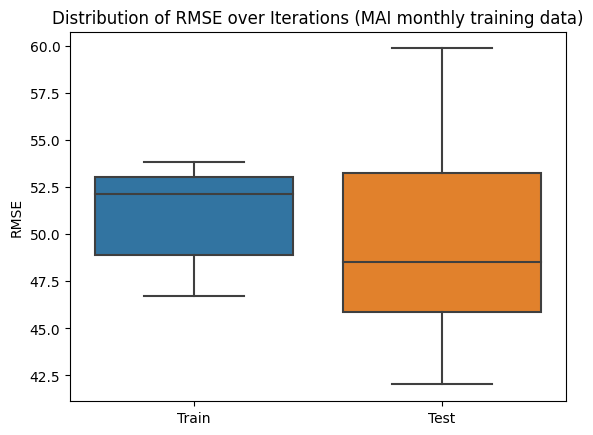

In [40]:
sns.boxplot(data=[list_RMSE_train_train, list_RMSE_train_val])
plt.xticks([0, 1], ['Train', 'Test'])
plt.ylabel('RMSE')
plt.title('Distribution of RMSE over Iterations (MAI monthly training data)')

The standard variation of RMSE is 6.05639336386479


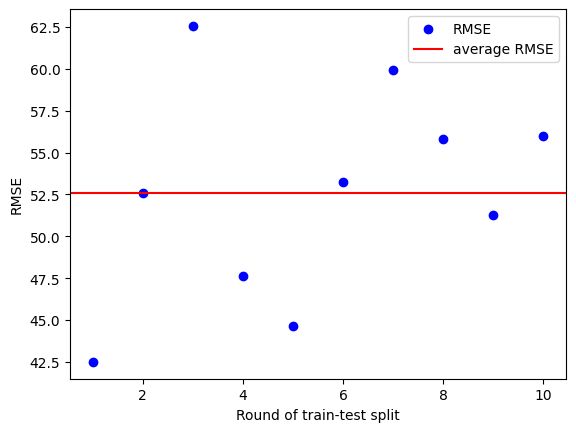

In [34]:
# Calculate the standard variation of RMSE
print('The standard variation of RMSE is', np.std(list_RMSE))
# Plot the RMSE of each round of random split
plt.scatter(y=list_RMSE,x=range(1,11),label='RMSE',color='blue')
plt.axhline(y=avg_RMSE, label='average RMSE',linestyle='-',color='red')

plt.xlabel('Round of train-test split')
plt.ylabel('RMSE')
#plt.title('RMSE of each round of random split, NN on MAI monthly')

plt.legend()

plt.show()

Epoch 1/10
171/171 [==============================] - 1s 4ms/step - loss: 3030.8630 - mae: 40.0990 - val_loss: 2861.3037 - val_mae: 39.9584
Epoch 2/10
171/171 [==============================] - 1s 4ms/step - loss: 3018.7896 - mae: 39.8256 - val_loss: 2852.1482 - val_mae: 39.7873
Epoch 3/10
171/171 [==============================] - 1s 3ms/step - loss: 3012.8010 - mae: 39.6882 - val_loss: 2846.6741 - val_mae: 39.6718
Epoch 4/10
171/171 [==============================] - 1s 3ms/step - loss: 3009.7368 - mae: 39.5845 - val_loss: 2844.0908 - val_mae: 39.6182
Epoch 5/10
171/171 [==============================] - 1s 3ms/step - loss: 3007.6758 - mae: 39.5427 - val_loss: 2842.1333 - val_mae: 39.5750
Epoch 6/10
171/171 [==============================] - 1s 4ms/step - loss: 3006.3547 - mae: 39.4634 - val_loss: 2840.8057 - val_mae: 39.5500
Epoch 7/10
171/171 [==============================] - 0s 3ms/step - loss: 3005.0801 - mae: 39.4414 - val_loss: 2839.6562 - val_mae: 39.5304
Epoch 8/10
171/171 [

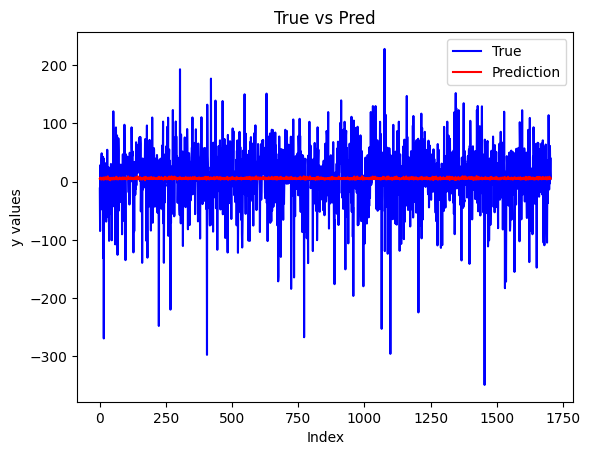

RMSE: 54.126054574294585, MAE: 39.4953810582264, R2: -0.0002846947392394217
Epoch 1/10
171/171 [==============================] - 1s 3ms/step - loss: 3012.7087 - mae: 40.1861 - val_loss: 2849.3762 - val_mae: 38.8710
Epoch 2/10
171/171 [==============================] - 0s 2ms/step - loss: 3000.3992 - mae: 39.9183 - val_loss: 2844.1978 - val_mae: 38.6841
Epoch 3/10
171/171 [==============================] - 0s 2ms/step - loss: 2995.2258 - mae: 39.7881 - val_loss: 2842.2717 - val_mae: 38.5792
Epoch 4/10
171/171 [==============================] - 0s 2ms/step - loss: 2992.5137 - mae: 39.7100 - val_loss: 2841.0789 - val_mae: 38.5489
Epoch 5/10
171/171 [==============================] - 0s 2ms/step - loss: 2990.8755 - mae: 39.6819 - val_loss: 2840.2346 - val_mae: 38.5041
Epoch 6/10
171/171 [==============================] - 1s 3ms/step - loss: 2989.7485 - mae: 39.6507 - val_loss: 2839.2996 - val_mae: 38.4850
Epoch 7/10
171/171 [==============================] - 1s 4ms/step - loss: 2988.7122 

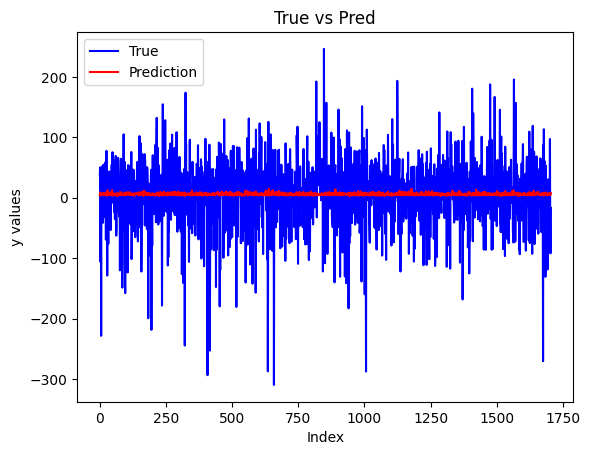

RMSE: 54.70317571143975, MAE: 39.45792387351188, R2: -0.0010900557112809572
Epoch 1/10
171/171 [==============================] - 1s 3ms/step - loss: 2989.4067 - mae: 40.2876 - val_loss: 2937.5449 - val_mae: 39.2711
Epoch 2/10
171/171 [==============================] - 0s 2ms/step - loss: 2978.1140 - mae: 40.0249 - val_loss: 2928.3430 - val_mae: 39.1160
Epoch 3/10
171/171 [==============================] - 0s 2ms/step - loss: 2972.5166 - mae: 39.8850 - val_loss: 2923.1223 - val_mae: 39.0141
Epoch 4/10
171/171 [==============================] - 0s 2ms/step - loss: 2969.9177 - mae: 39.7880 - val_loss: 2920.8982 - val_mae: 38.9727
Epoch 5/10
171/171 [==============================] - 0s 2ms/step - loss: 2968.0645 - mae: 39.7062 - val_loss: 2919.4502 - val_mae: 38.9503
Epoch 6/10
171/171 [==============================] - 0s 2ms/step - loss: 2966.7109 - mae: 39.7138 - val_loss: 2918.1475 - val_mae: 38.9332
Epoch 7/10
171/171 [==============================] - 0s 2ms/step - loss: 2965.5547 

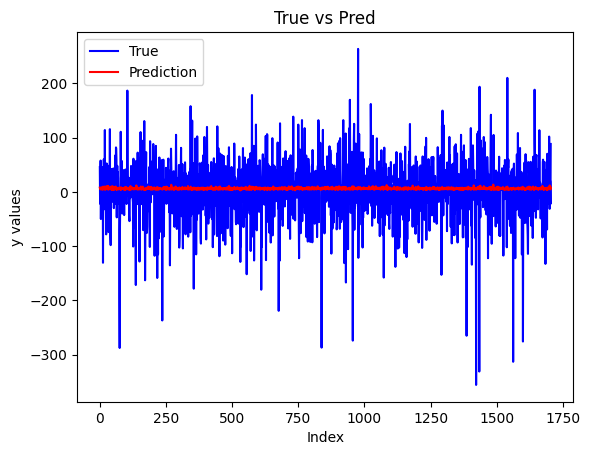

RMSE: 54.65650605914114, MAE: 38.8731292874268, R2: 0.000624808682200273
Epoch 1/10
171/171 [==============================] - 3s 5ms/step - loss: 3023.1658 - mae: 40.4246 - val_loss: 2839.2136 - val_mae: 38.7231
Epoch 2/10
171/171 [==============================] - 1s 3ms/step - loss: 3000.6006 - mae: 40.0604 - val_loss: 2844.0850 - val_mae: 38.5628
Epoch 3/10
171/171 [==============================] - 1s 4ms/step - loss: 2987.4009 - mae: 39.8172 - val_loss: 2850.6326 - val_mae: 38.4836
Epoch 4/10
171/171 [==============================] - 1s 4ms/step - loss: 2979.9104 - mae: 39.6316 - val_loss: 2858.6543 - val_mae: 38.4368
Epoch 5/10
171/171 [==============================] - 1s 3ms/step - loss: 2975.8162 - mae: 39.5087 - val_loss: 2864.4937 - val_mae: 38.4154
Epoch 6/10
171/171 [==============================] - 1s 4ms/step - loss: 2973.3440 - mae: 39.4450 - val_loss: 2867.7261 - val_mae: 38.4060
Epoch 7/10
171/171 [==============================] - 1s 3ms/step - loss: 2971.3818 - m

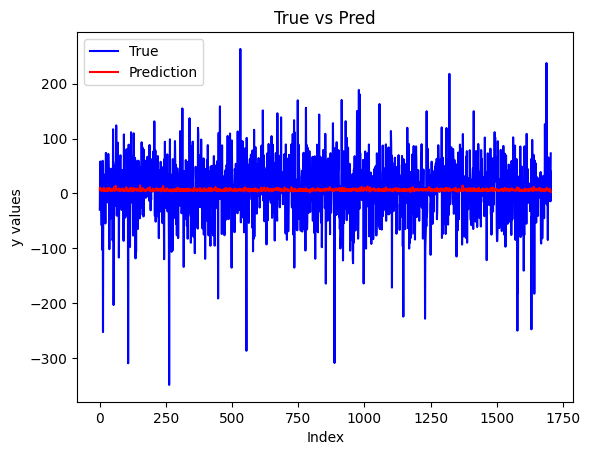

RMSE: 54.771807549341446, MAE: 40.104724430102635, R2: -0.0010795165374117843
Epoch 1/10
171/171 [==============================] - 1s 3ms/step - loss: 3095.2263 - mae: 40.4516 - val_loss: 2970.2512 - val_mae: 40.6744
Epoch 2/10
171/171 [==============================] - 0s 2ms/step - loss: 3083.7634 - mae: 40.2174 - val_loss: 2957.4102 - val_mae: 40.4539
Epoch 3/10
171/171 [==============================] - 0s 2ms/step - loss: 3077.3162 - mae: 40.0562 - val_loss: 2949.7769 - val_mae: 40.3154
Epoch 4/10
171/171 [==============================] - 0s 2ms/step - loss: 3073.6274 - mae: 39.9805 - val_loss: 2945.0396 - val_mae: 40.2248
Epoch 5/10
171/171 [==============================] - 0s 2ms/step - loss: 3070.8599 - mae: 39.9079 - val_loss: 2941.2739 - val_mae: 40.1519
Epoch 6/10
171/171 [==============================] - 0s 2ms/step - loss: 3069.0928 - mae: 39.8625 - val_loss: 2939.0254 - val_mae: 40.1132
Epoch 7/10
171/171 [==============================] - 0s 3ms/step - loss: 3067.474

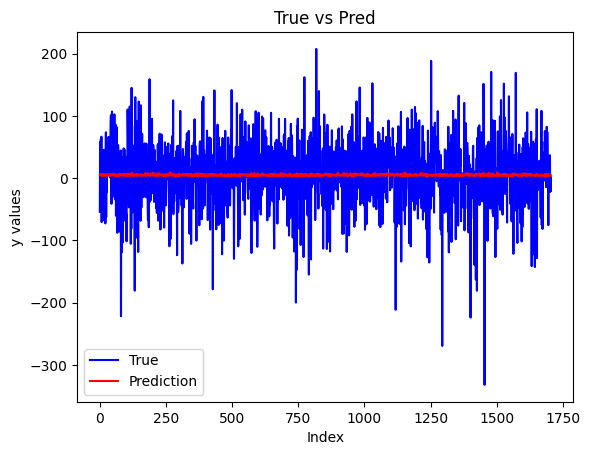

RMSE: 51.65004976278541, MAE: 38.37583665656691, R2: -0.0033172170502000498
Epoch 1/10
171/171 [==============================] - 1s 3ms/step - loss: 3026.9045 - mae: 40.5220 - val_loss: 2807.6667 - val_mae: 39.1294
Epoch 2/10
171/171 [==============================] - 0s 2ms/step - loss: 3006.0884 - mae: 40.1209 - val_loss: 2789.2175 - val_mae: 38.8173
Epoch 3/10
171/171 [==============================] - 0s 2ms/step - loss: 2995.8845 - mae: 39.9126 - val_loss: 2780.0342 - val_mae: 38.6404
Epoch 4/10
171/171 [==============================] - 0s 2ms/step - loss: 2990.8496 - mae: 39.7665 - val_loss: 2774.3533 - val_mae: 38.5181
Epoch 5/10
171/171 [==============================] - 0s 2ms/step - loss: 2988.4143 - mae: 39.6750 - val_loss: 2772.1951 - val_mae: 38.4703
Epoch 6/10
171/171 [==============================] - 0s 2ms/step - loss: 2986.6851 - mae: 39.6540 - val_loss: 2770.2935 - val_mae: 38.4283
Epoch 7/10
171/171 [==============================] - 0s 2ms/step - loss: 2985.6292 

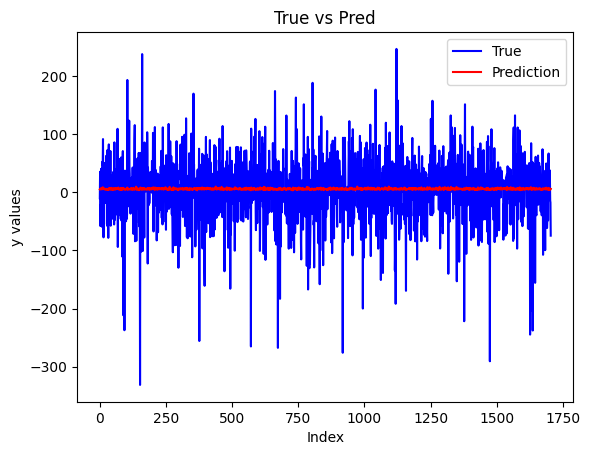

RMSE: 55.15424020775895, MAE: 39.71155860690539, R2: 0.0015391578067124323
Epoch 1/10
171/171 [==============================] - 1s 3ms/step - loss: 2928.7058 - mae: 39.6737 - val_loss: 3208.7070 - val_mae: 41.3845
Epoch 2/10
171/171 [==============================] - 0s 2ms/step - loss: 2916.0320 - mae: 39.4197 - val_loss: 3204.7761 - val_mae: 41.2035
Epoch 3/10
171/171 [==============================] - 0s 2ms/step - loss: 2911.2595 - mae: 39.2499 - val_loss: 3203.8679 - val_mae: 41.1060
Epoch 4/10
171/171 [==============================] - 0s 2ms/step - loss: 2908.8796 - mae: 39.1981 - val_loss: 3203.6653 - val_mae: 41.0404
Epoch 5/10
171/171 [==============================] - 0s 2ms/step - loss: 2907.3540 - mae: 39.1436 - val_loss: 3203.2310 - val_mae: 41.0229
Epoch 6/10
171/171 [==============================] - 0s 2ms/step - loss: 2906.1917 - mae: 39.1523 - val_loss: 3203.1497 - val_mae: 40.9887
Epoch 7/10
171/171 [==============================] - 0s 2ms/step - loss: 2904.7720 -

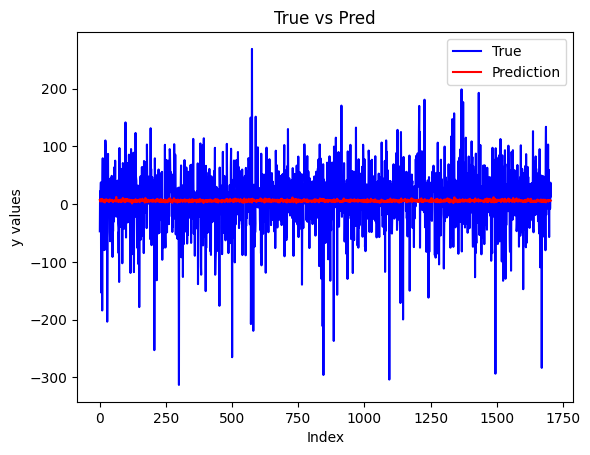

RMSE: 54.31957893731379, MAE: 39.07098308729881, R2: 0.00037008933603566163
Epoch 1/10
171/171 [==============================] - 1s 3ms/step - loss: 3091.0020 - mae: 40.6881 - val_loss: 2742.0107 - val_mae: 37.9002
Epoch 2/10
171/171 [==============================] - 0s 2ms/step - loss: 3073.3611 - mae: 40.3484 - val_loss: 2729.3494 - val_mae: 37.6340
Epoch 3/10
171/171 [==============================] - 0s 2ms/step - loss: 3064.7007 - mae: 40.1231 - val_loss: 2721.9504 - val_mae: 37.4440
Epoch 4/10
171/171 [==============================] - 0s 3ms/step - loss: 3061.1531 - mae: 40.0153 - val_loss: 2719.4783 - val_mae: 37.3669
Epoch 5/10
171/171 [==============================] - 0s 2ms/step - loss: 3059.0728 - mae: 39.9382 - val_loss: 2717.7944 - val_mae: 37.3103
Epoch 6/10
171/171 [==============================] - 0s 2ms/step - loss: 3057.9409 - mae: 39.8878 - val_loss: 2716.6140 - val_mae: 37.2718
Epoch 7/10
171/171 [==============================] - 0s 3ms/step - loss: 3056.8113 

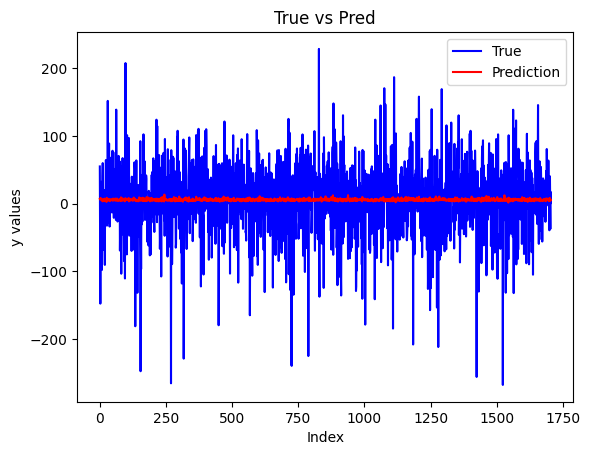

RMSE: 53.584731839392276, MAE: 39.83605339829339, R2: -0.0010393846315308597
Epoch 1/10
171/171 [==============================] - 1s 3ms/step - loss: 2957.4871 - mae: 39.8484 - val_loss: 3068.1409 - val_mae: 40.6849
Epoch 2/10
171/171 [==============================] - 0s 2ms/step - loss: 2941.2715 - mae: 39.5042 - val_loss: 3057.5254 - val_mae: 40.4319
Epoch 3/10
171/171 [==============================] - 0s 2ms/step - loss: 2932.8232 - mae: 39.3055 - val_loss: 3052.4207 - val_mae: 40.2803
Epoch 4/10
171/171 [==============================] - 0s 2ms/step - loss: 2928.5303 - mae: 39.1885 - val_loss: 3050.0281 - val_mae: 40.1858
Epoch 5/10
171/171 [==============================] - 0s 2ms/step - loss: 2925.7544 - mae: 39.1084 - val_loss: 3049.0466 - val_mae: 40.1347
Epoch 6/10
171/171 [==============================] - 1s 3ms/step - loss: 2923.7397 - mae: 39.0655 - val_loss: 3048.6951 - val_mae: 40.1145
Epoch 7/10
171/171 [==============================] - 1s 4ms/step - loss: 2922.1418

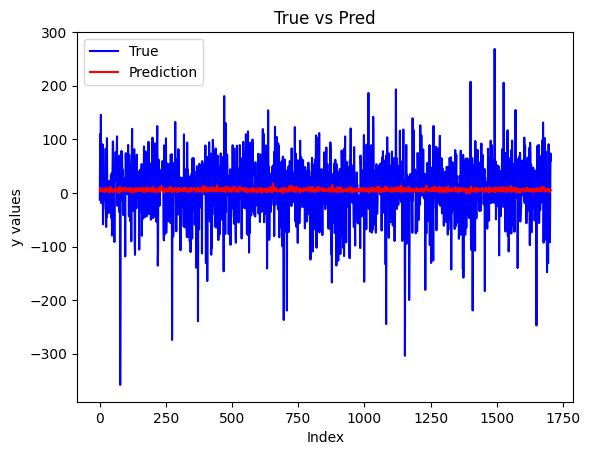

RMSE: 54.870668264053485, MAE: 40.085097162325134, R2: 0.00016823599742332718
Epoch 1/10
171/171 [==============================] - 2s 7ms/step - loss: 2983.7422 - mae: 40.4219 - val_loss: 3171.8350 - val_mae: 40.5968
Epoch 2/10
171/171 [==============================] - 1s 6ms/step - loss: 2954.6292 - mae: 39.9056 - val_loss: 3161.4900 - val_mae: 40.3406
Epoch 3/10
171/171 [==============================] - 0s 3ms/step - loss: 2941.0020 - mae: 39.5948 - val_loss: 3158.6909 - val_mae: 40.2136
Epoch 4/10
171/171 [==============================] - 1s 3ms/step - loss: 2934.4814 - mae: 39.4290 - val_loss: 3158.3108 - val_mae: 40.1382
Epoch 5/10
171/171 [==============================] - 0s 3ms/step - loss: 2931.2756 - mae: 39.3312 - val_loss: 3158.8450 - val_mae: 40.0900
Epoch 6/10
171/171 [==============================] - 0s 3ms/step - loss: 2929.4551 - mae: 39.2537 - val_loss: 3159.0583 - val_mae: 40.0632
Epoch 7/10
171/171 [==============================] - 1s 4ms/step - loss: 2928.227

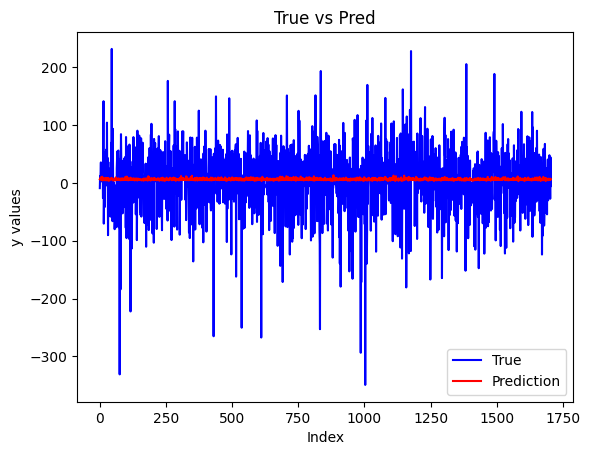

RMSE: 54.048287337729704, MAE: 39.34110515363606, R2: 0.001028947123771995
The average RMSE is 54.188510024325055


In [36]:
# Test the performance of the model on 10 different random train-test splits of MAI daily data, and report the average RMSE.
list_RMSE_train_train1=[]
list_RMSE_train_val1=[]
list_RMSE1=[]
for i in range(0,10):
  # Generate training and test data sets
  X_train, y_train, X_test, y_test = split_data(X_mai_d, y_mkt_d, 0.2, i)

  # Use X_train and y_train as MAI features and target variable
  trained_model, training_history, avg_RMSE_train, avg_RMSE_test = train_neural_network_MAI(X_train, y_train)
  print('During training of this NN model, average training RMSE is', avg_RMSE_train, ', average validation RMSE is', avg_RMSE_test)
  list_RMSE_train_train1.append(avg_RMSE_train)
  list_RMSE_train_val1.append(avg_RMSE_test)

  # Have the performance of the trained model evaluated on the test set
  MSE, MAE, R2 = test_model(trained_model, X_test, y_test)
  print(f'RMSE: {MSE**(1/2)}, MAE: {MAE}, R2: {R2}')
  list_RMSE1.append(MSE**(1/2))
avg_RMSE1=np.mean(list_RMSE1)
print('The average RMSE is', avg_RMSE1)

Text(0.5, 1.0, 'Distribution of RMSE over Iterations (MAI daily training data)')

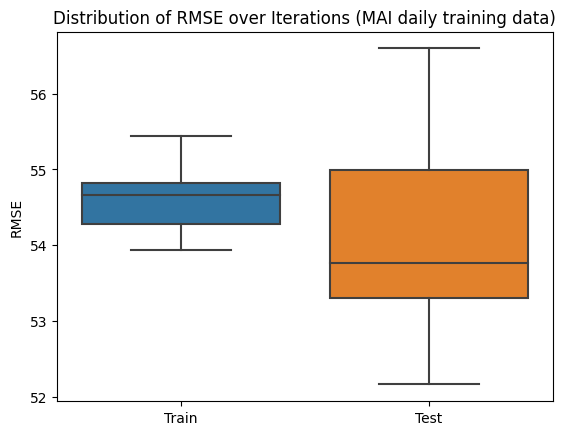

In [39]:
sns.boxplot(data=[list_RMSE_train_train1, list_RMSE_train_val1])
plt.xticks([0, 1], ['Train', 'Test'])
plt.ylabel('RMSE')
plt.title('Distribution of RMSE over Iterations (MAI daily training data)')

Epoch 1/10
9/9 [==============================] - 1s 25ms/step - loss: 2687.7751 - mae: 40.2464 - val_loss: 3590.4998 - val_mae: 41.5205
Epoch 2/10
9/9 [==============================] - 0s 6ms/step - loss: 2681.9475 - mae: 40.2126 - val_loss: 3590.3679 - val_mae: 41.5133
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 2669.8542 - mae: 40.0713 - val_loss: 3590.2153 - val_mae: 41.5037
Epoch 4/10
9/9 [==============================] - 0s 6ms/step - loss: 2680.3967 - mae: 40.1272 - val_loss: 3590.1274 - val_mae: 41.4982
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 2694.6541 - mae: 40.2458 - val_loss: 3590.0186 - val_mae: 41.4898
Epoch 6/10
9/9 [==============================] - 0s 8ms/step - loss: 2671.9028 - mae: 40.0558 - val_loss: 3589.9331 - val_mae: 41.4819
Epoch 7/10
9/9 [==============================] - 0s 6ms/step - loss: 2679.4763 - mae: 39.9703 - val_loss: 3589.8555 - val_mae: 41.4718
Epoch 8/10
9/9 [==============================]

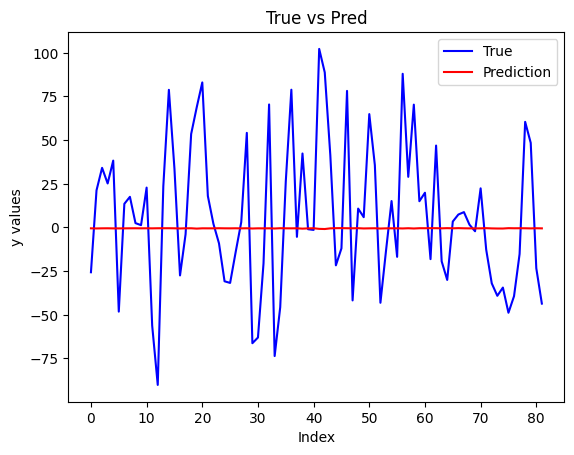

RMSE: 42.79386019146599, MAE: 34.189566140254584, R2: -0.030776447595437295
Epoch 1/10
9/9 [==============================] - 1s 33ms/step - loss: 2827.8862 - mae: 39.3315 - val_loss: 1815.5544 - val_mae: 34.8507
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 2820.4207 - mae: 39.3471 - val_loss: 1814.7917 - val_mae: 34.8407
Epoch 3/10
9/9 [==============================] - 0s 10ms/step - loss: 2821.2971 - mae: 39.2729 - val_loss: 1814.3114 - val_mae: 34.8343
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 2816.4656 - mae: 39.1559 - val_loss: 1813.6487 - val_mae: 34.8252
Epoch 5/10
9/9 [==============================] - 0s 9ms/step - loss: 2824.7122 - mae: 39.1416 - val_loss: 1813.0686 - val_mae: 34.8169
Epoch 6/10
9/9 [==============================] - 0s 9ms/step - loss: 2811.5659 - mae: 39.1373 - val_loss: 1812.4707 - val_mae: 34.8082
Epoch 7/10
9/9 [==============================] - 0s 9ms/step - loss: 2815.1553 - mae: 39.1178 - val_loss:

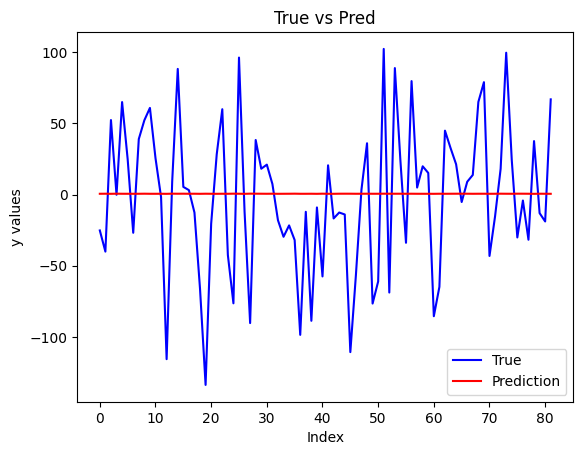

RMSE: 52.41859204011534, MAE: 41.40600483984106, R2: -0.003111579389754038
Epoch 1/10
9/9 [==============================] - 2s 28ms/step - loss: 2197.1294 - mae: 35.3657 - val_loss: 2809.3994 - val_mae: 40.2485
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 2196.8203 - mae: 35.2952 - val_loss: 2809.2605 - val_mae: 40.2201
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 2205.5242 - mae: 35.1882 - val_loss: 2809.1750 - val_mae: 40.1872
Epoch 4/10
9/9 [==============================] - 0s 6ms/step - loss: 2222.9219 - mae: 35.4437 - val_loss: 2809.1140 - val_mae: 40.1562
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 2201.0754 - mae: 35.3693 - val_loss: 2809.0872 - val_mae: 40.1293
Epoch 6/10
9/9 [==============================] - 0s 6ms/step - loss: 2208.3459 - mae: 35.3611 - val_loss: 2809.0786 - val_mae: 40.0994
Epoch 7/10
9/9 [==============================] - 0s 6ms/step - loss: 2207.8665 - mae: 35.2553 - val_loss: 2

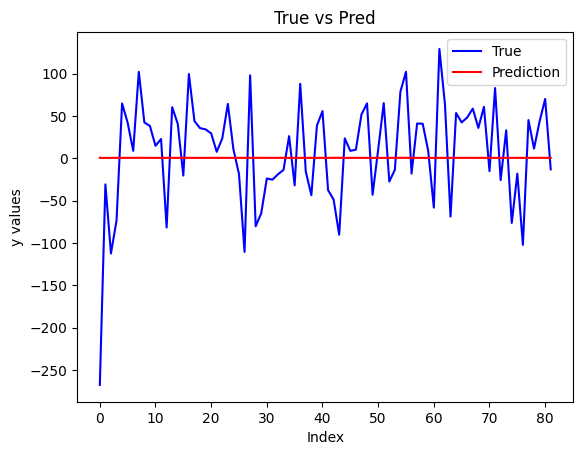

RMSE: 62.458142330059204, MAE: 49.50914727926238, R2: -0.01614783863693048
Epoch 1/10
9/9 [==============================] - 1s 25ms/step - loss: 2870.8206 - mae: 39.7184 - val_loss: 2317.8081 - val_mae: 38.6131
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 2841.4119 - mae: 39.3916 - val_loss: 2316.3687 - val_mae: 38.5865
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 2860.5083 - mae: 39.5711 - val_loss: 2314.6829 - val_mae: 38.5552
Epoch 4/10
9/9 [==============================] - 0s 6ms/step - loss: 2843.1011 - mae: 39.4519 - val_loss: 2312.5022 - val_mae: 38.5143
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 2854.5798 - mae: 39.5432 - val_loss: 2310.9998 - val_mae: 38.4858
Epoch 6/10
9/9 [==============================] - 0s 6ms/step - loss: 2861.9690 - mae: 39.5765 - val_loss: 2308.8833 - val_mae: 38.4457
Epoch 7/10
9/9 [==============================] - 0s 10ms/step - loss: 2858.3833 - mae: 39.5741 - val_loss: 

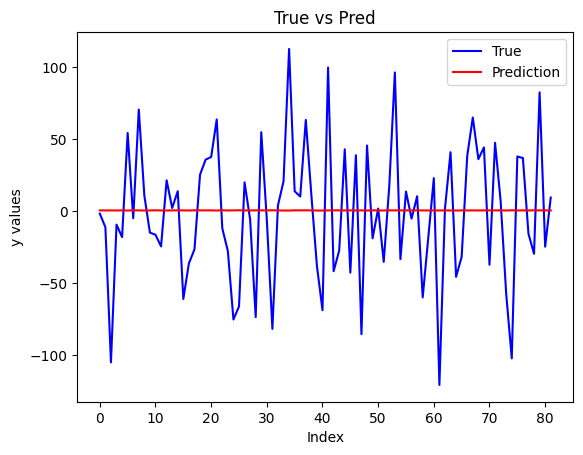

RMSE: 47.62472474929261, MAE: 37.806005948537894, R2: -0.002399751341560119
Epoch 1/10
9/9 [==============================] - 1s 24ms/step - loss: 2891.4055 - mae: 40.6565 - val_loss: 2409.3313 - val_mae: 37.7010
Epoch 2/10
9/9 [==============================] - 0s 7ms/step - loss: 2880.9094 - mae: 40.4953 - val_loss: 2408.5847 - val_mae: 37.6895
Epoch 3/10
9/9 [==============================] - 0s 6ms/step - loss: 2905.4182 - mae: 40.6939 - val_loss: 2407.7092 - val_mae: 37.6763
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 2896.8755 - mae: 40.5639 - val_loss: 2406.7395 - val_mae: 37.6610
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 2915.0486 - mae: 40.7978 - val_loss: 2405.7676 - val_mae: 37.6450
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 2909.3076 - mae: 40.5550 - val_loss: 2405.0369 - val_mae: 37.6328
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 2897.3105 - mae: 40.4860 - val_loss: 

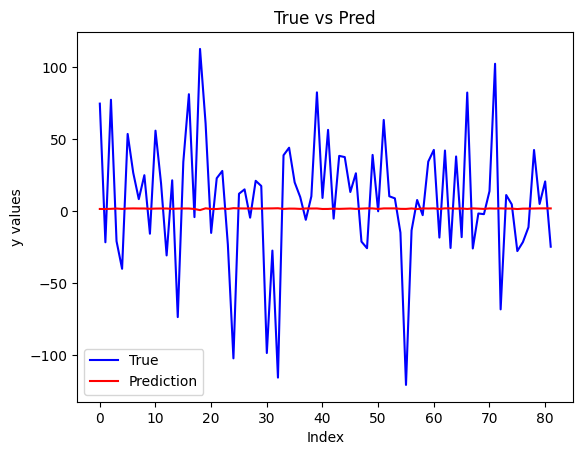

RMSE: 44.58977485372337, MAE: 33.4783568152854, R2: -0.023591655659709554
Epoch 1/10
9/9 [==============================] - 1s 24ms/step - loss: 2790.4507 - mae: 39.2542 - val_loss: 1782.0431 - val_mae: 32.8527
Epoch 2/10
9/9 [==============================] - 0s 6ms/step - loss: 2808.8606 - mae: 39.3469 - val_loss: 1781.4583 - val_mae: 32.8296
Epoch 3/10
9/9 [==============================] - 0s 7ms/step - loss: 2798.0989 - mae: 39.2528 - val_loss: 1780.8733 - val_mae: 32.8059
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 2811.8560 - mae: 39.3771 - val_loss: 1780.2256 - val_mae: 32.7786
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 2803.6506 - mae: 39.3880 - val_loss: 1779.7318 - val_mae: 32.7572
Epoch 6/10
9/9 [==============================] - 0s 8ms/step - loss: 2808.0015 - mae: 39.3772 - val_loss: 1779.1284 - val_mae: 32.7298
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 2793.6301 - mae: 39.3042 - val_loss: 17

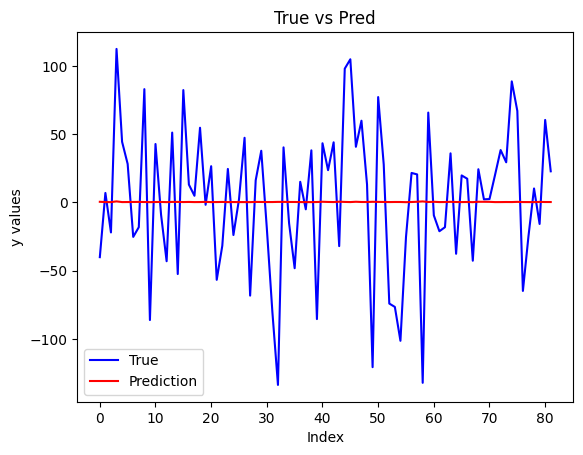

RMSE: 53.33849976842182, MAE: 42.81369259684304, R2: -0.001390761292085596
Epoch 1/10
9/9 [==============================] - 1s 34ms/step - loss: 2286.5356 - mae: 36.8698 - val_loss: 2843.9031 - val_mae: 40.0773
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 2280.1030 - mae: 36.7631 - val_loss: 2842.4790 - val_mae: 40.0463
Epoch 3/10
9/9 [==============================] - 0s 10ms/step - loss: 2290.9429 - mae: 36.8392 - val_loss: 2841.2336 - val_mae: 40.0185
Epoch 4/10
9/9 [==============================] - 0s 10ms/step - loss: 2299.0847 - mae: 36.9460 - val_loss: 2840.4001 - val_mae: 39.9997
Epoch 5/10
9/9 [==============================] - 0s 11ms/step - loss: 2281.2764 - mae: 36.7863 - val_loss: 2839.5671 - val_mae: 39.9820
Epoch 6/10
9/9 [==============================] - 0s 10ms/step - loss: 2280.2007 - mae: 36.8747 - val_loss: 2839.2559 - val_mae: 39.9756
Epoch 7/10
9/9 [==============================] - 0s 10ms/step - loss: 2276.2700 - mae: 36.7366 - val_lo

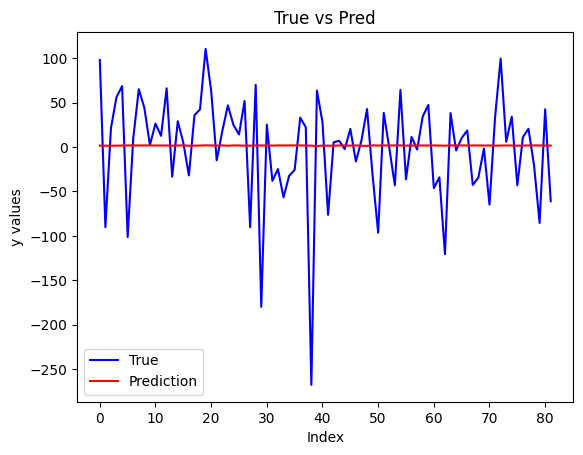

RMSE: 59.8876747831575, MAE: 43.611368326495544, R2: -0.0023490831828134606
Epoch 1/10
9/9 [==============================] - 1s 24ms/step - loss: 2338.9844 - mae: 36.7332 - val_loss: 3284.5801 - val_mae: 45.1997
Epoch 2/10
9/9 [==============================] - 0s 6ms/step - loss: 2339.4790 - mae: 36.7594 - val_loss: 3283.4800 - val_mae: 45.1723
Epoch 3/10
9/9 [==============================] - 0s 9ms/step - loss: 2347.6887 - mae: 36.7766 - val_loss: 3282.3210 - val_mae: 45.1415
Epoch 4/10
9/9 [==============================] - 0s 7ms/step - loss: 2321.2615 - mae: 36.5483 - val_loss: 3281.2327 - val_mae: 45.1124
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 2319.9731 - mae: 36.5148 - val_loss: 3280.3267 - val_mae: 45.0868
Epoch 6/10
9/9 [==============================] - 0s 6ms/step - loss: 2327.9424 - mae: 36.5470 - val_loss: 3279.4055 - val_mae: 45.0630
Epoch 7/10
9/9 [==============================] - 0s 9ms/step - loss: 2342.4243 - mae: 36.7116 - val_loss: 

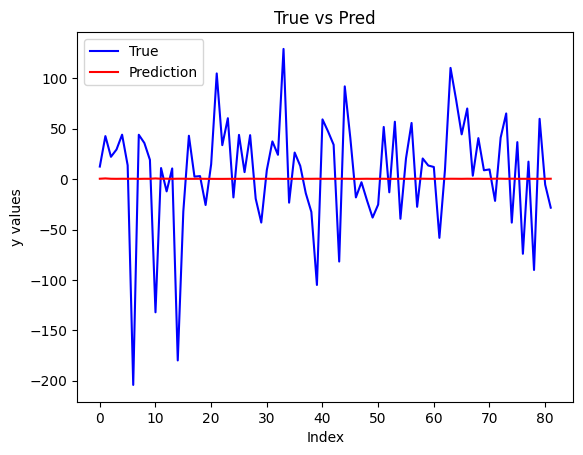

RMSE: 56.00435592882958, MAE: 41.52604596189878, R2: -0.013993220872232426
Epoch 1/10
9/9 [==============================] - 1s 24ms/step - loss: 2769.2268 - mae: 39.3530 - val_loss: 2179.8542 - val_mae: 36.1218
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 2768.1804 - mae: 39.3378 - val_loss: 2180.3789 - val_mae: 36.1285
Epoch 3/10
9/9 [==============================] - 0s 7ms/step - loss: 2777.8018 - mae: 39.4707 - val_loss: 2179.6584 - val_mae: 36.1195
Epoch 4/10
9/9 [==============================] - 0s 6ms/step - loss: 2755.4353 - mae: 39.2946 - val_loss: 2179.1221 - val_mae: 36.1128
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 2786.1382 - mae: 39.5013 - val_loss: 2178.4429 - val_mae: 36.1044
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 2787.9041 - mae: 39.5464 - val_loss: 2176.8315 - val_mae: 36.0841
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 2765.9050 - mae: 39.3219 - val_loss: 2

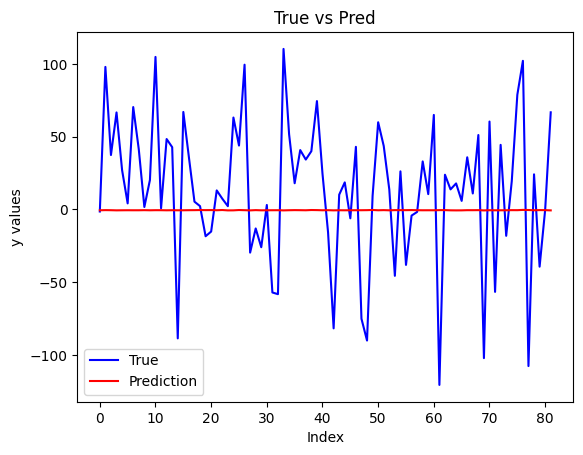

RMSE: 51.47147738285015, MAE: 40.489900495066564, R2: -0.07613984934993034
Epoch 1/10
9/9 [==============================] - 1s 30ms/step - loss: 2639.4592 - mae: 39.3779 - val_loss: 2080.3320 - val_mae: 37.5676
Epoch 2/10
9/9 [==============================] - 0s 7ms/step - loss: 2633.8452 - mae: 39.2945 - val_loss: 2079.1841 - val_mae: 37.5482
Epoch 3/10
9/9 [==============================] - 0s 12ms/step - loss: 2635.1611 - mae: 39.3266 - val_loss: 2078.3823 - val_mae: 37.5347
Epoch 4/10
9/9 [==============================] - 0s 13ms/step - loss: 2617.8582 - mae: 39.2856 - val_loss: 2077.5349 - val_mae: 37.5198
Epoch 5/10
9/9 [==============================] - 0s 14ms/step - loss: 2621.2998 - mae: 39.2630 - val_loss: 2076.7803 - val_mae: 37.5066
Epoch 6/10
9/9 [==============================] - 0s 16ms/step - loss: 2629.2087 - mae: 39.3741 - val_loss: 2076.0769 - val_mae: 37.4943
Epoch 7/10
9/9 [==============================] - 0s 10ms/step - loss: 2617.4111 - mae: 39.1211 - val_lo

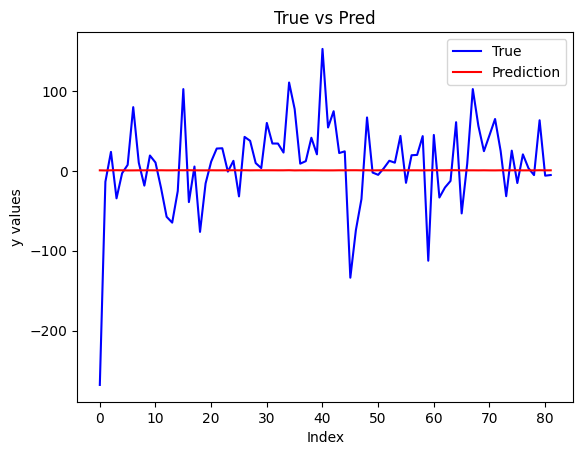

RMSE: 56.0256647356469, MAE: 38.571793976780754, R2: -0.0213066455575186
The average RMSE is 52.66127667635624


In [43]:
# Test the performance of the model on 10 different random train-test splits of MEF monthly data, and report the average RMSE.
list_RMSE_train_train2=[]
list_RMSE_train_val2=[]
list_RMSE2=[]
for i in range(0,10):
  # Generate training and test data sets
  X_train, y_train, X_test, y_test = split_data(X_mef_m, y_mkt_m, 0.2, i)

  # Use X_train and y_train as MAI features and target variable
  trained_model, training_history, avg_RMSE_train, avg_RMSE_test = train_neural_network_MEF(X_train, y_train)
  print('During training of this NN model, average training RMSE is', avg_RMSE_train, ', average validation RMSE is', avg_RMSE_test)
  list_RMSE_train_train2.append(avg_RMSE_train)
  list_RMSE_train_val2.append(avg_RMSE_test)

  # Have the performance of the trained model evaluated on the test set
  MSE, MAE, R2 = test_model(trained_model, X_test, y_test)
  print(f'RMSE: {MSE**(1/2)}, MAE: {MAE}, R2: {R2}')
  list_RMSE2.append(MSE**(1/2))
avg_RMSE2=np.mean(list_RMSE2)
print('The average RMSE is', avg_RMSE2)

Text(0.5, 1.0, 'Distribution of RMSE over Iterations (MEF monthly training data)')

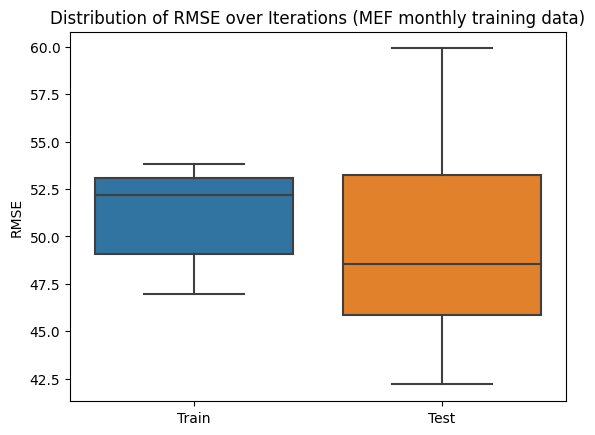

In [44]:
sns.boxplot(data=[list_RMSE_train_train2, list_RMSE_train_val2])
plt.xticks([0, 1], ['Train', 'Test'])
plt.ylabel('RMSE')
plt.title('Distribution of RMSE over Iterations (MEF monthly training data)')

Epoch 1/10
171/171 [==============================] - 2s 4ms/step - loss: 3039.0312 - mae: 40.2373 - val_loss: 2868.2505 - val_mae: 40.0805
Epoch 2/10
171/171 [==============================] - 1s 3ms/step - loss: 3026.4902 - mae: 40.0078 - val_loss: 2857.7788 - val_mae: 39.8986
Epoch 3/10
171/171 [==============================] - 1s 3ms/step - loss: 3017.3831 - mae: 39.8267 - val_loss: 2851.2749 - val_mae: 39.7742
Epoch 4/10
171/171 [==============================] - 1s 4ms/step - loss: 3017.5984 - mae: 39.7600 - val_loss: 2847.9590 - val_mae: 39.7046
Epoch 5/10
171/171 [==============================] - 1s 6ms/step - loss: 3012.8657 - mae: 39.6720 - val_loss: 2845.5828 - val_mae: 39.6475
Epoch 6/10
171/171 [==============================] - 0s 3ms/step - loss: 3010.3142 - mae: 39.5977 - val_loss: 2844.3721 - val_mae: 39.6170
Epoch 7/10
171/171 [==============================] - 0s 2ms/step - loss: 3012.5327 - mae: 39.6076 - val_loss: 2843.5813 - val_mae: 39.5952
Epoch 8/10
171/171 [

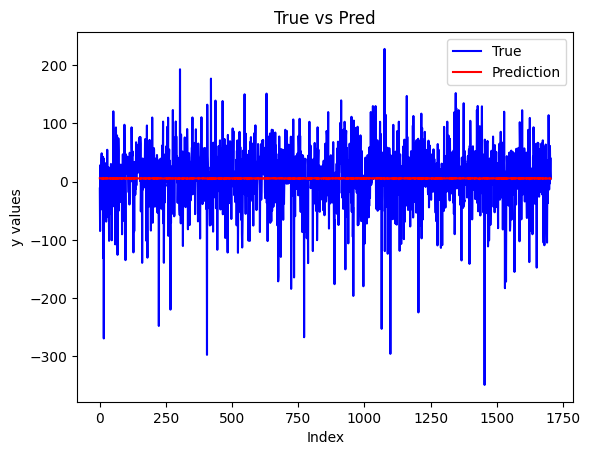

RMSE: 54.16261960708779, MAE: 39.536353153974886, R2: -0.0016366424207494568
Epoch 1/10
171/171 [==============================] - 2s 9ms/step - loss: 3027.8645 - mae: 40.4881 - val_loss: 2859.8391 - val_mae: 39.1846
Epoch 2/10
171/171 [==============================] - 1s 3ms/step - loss: 3015.0759 - mae: 40.2852 - val_loss: 2849.8804 - val_mae: 38.9697
Epoch 3/10
171/171 [==============================] - 0s 2ms/step - loss: 3007.3669 - mae: 40.0862 - val_loss: 2843.2625 - val_mae: 38.8072
Epoch 4/10
171/171 [==============================] - 0s 2ms/step - loss: 3001.3989 - mae: 39.9671 - val_loss: 2839.5637 - val_mae: 38.6902
Epoch 5/10
171/171 [==============================] - 1s 4ms/step - loss: 2994.7690 - mae: 39.8661 - val_loss: 2837.1855 - val_mae: 38.5847
Epoch 6/10
171/171 [==============================] - 1s 3ms/step - loss: 2994.1094 - mae: 39.8149 - val_loss: 2836.6292 - val_mae: 38.5499
Epoch 7/10
171/171 [==============================] - 1s 5ms/step - loss: 2998.1208

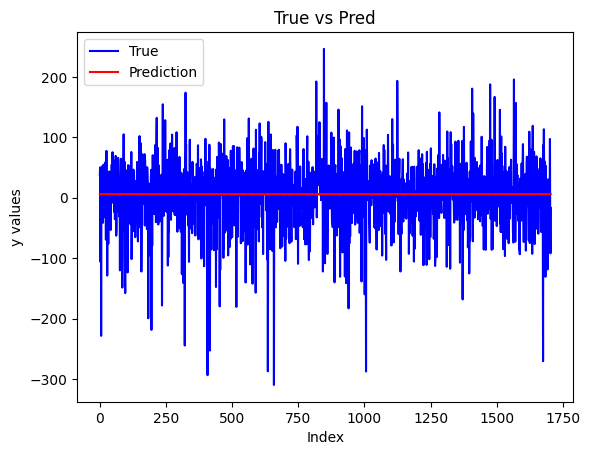

RMSE: 54.69811384859234, MAE: 39.558512220856535, R2: -0.000904796042408007
Epoch 1/10
171/171 [==============================] - 2s 5ms/step - loss: 2996.1333 - mae: 40.4276 - val_loss: 2944.9045 - val_mae: 39.3609
Epoch 2/10
171/171 [==============================] - 1s 4ms/step - loss: 2988.7444 - mae: 40.2443 - val_loss: 2936.6238 - val_mae: 39.2246
Epoch 3/10
171/171 [==============================] - 1s 3ms/step - loss: 2980.7021 - mae: 40.0921 - val_loss: 2931.4033 - val_mae: 39.1359
Epoch 4/10
171/171 [==============================] - 0s 2ms/step - loss: 2981.5161 - mae: 40.0346 - val_loss: 2928.4360 - val_mae: 39.0815
Epoch 5/10
171/171 [==============================] - 0s 2ms/step - loss: 2973.8950 - mae: 39.9423 - val_loss: 2925.9758 - val_mae: 39.0322
Epoch 6/10
171/171 [==============================] - 0s 2ms/step - loss: 2977.1982 - mae: 39.9259 - val_loss: 2924.7144 - val_mae: 39.0043
Epoch 7/10
171/171 [==============================] - 0s 2ms/step - loss: 2974.7742 

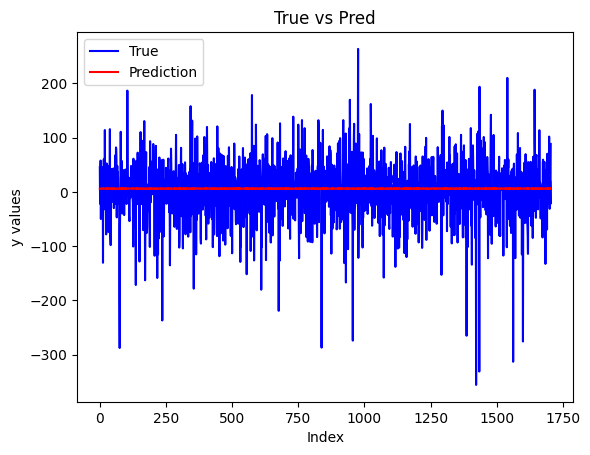

RMSE: 54.728360175601125, MAE: 38.942980688696665, R2: -0.0020045735642229
Epoch 1/10
171/171 [==============================] - 1s 3ms/step - loss: 3001.5952 - mae: 40.0847 - val_loss: 2845.9966 - val_mae: 38.5574
Epoch 2/10
171/171 [==============================] - 0s 2ms/step - loss: 2990.3438 - mae: 39.8295 - val_loss: 2854.0078 - val_mae: 38.4733
Epoch 3/10
171/171 [==============================] - 0s 2ms/step - loss: 2988.1230 - mae: 39.7265 - val_loss: 2861.0232 - val_mae: 38.4380
Epoch 4/10
171/171 [==============================] - 0s 2ms/step - loss: 2981.6492 - mae: 39.6015 - val_loss: 2866.8901 - val_mae: 38.4210
Epoch 5/10
171/171 [==============================] - 0s 2ms/step - loss: 2982.5874 - mae: 39.5772 - val_loss: 2869.8699 - val_mae: 38.4158
Epoch 6/10
171/171 [==============================] - 1s 3ms/step - loss: 2982.7778 - mae: 39.5541 - val_loss: 2872.8247 - val_mae: 38.4118
Epoch 7/10
171/171 [==============================] - 1s 4ms/step - loss: 2977.0435 -

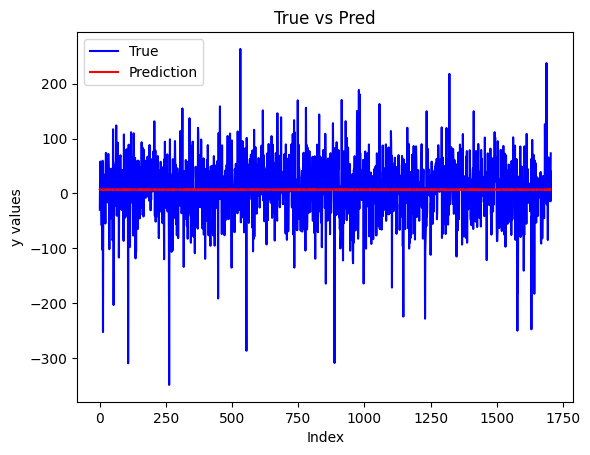

RMSE: 54.80570610051036, MAE: 40.088510833628206, R2: -0.002319046436153327
Epoch 1/10
171/171 [==============================] - 1s 3ms/step - loss: 3084.1064 - mae: 40.2131 - val_loss: 2955.7639 - val_mae: 40.4266
Epoch 2/10
171/171 [==============================] - 0s 2ms/step - loss: 3077.3870 - mae: 40.1021 - val_loss: 2949.0498 - val_mae: 40.3021
Epoch 3/10
171/171 [==============================] - 0s 2ms/step - loss: 3078.3274 - mae: 40.0164 - val_loss: 2945.6096 - val_mae: 40.2322
Epoch 4/10
171/171 [==============================] - 0s 2ms/step - loss: 3070.1086 - mae: 39.8927 - val_loss: 2942.6755 - val_mae: 40.1683
Epoch 5/10
171/171 [==============================] - 0s 2ms/step - loss: 3077.5852 - mae: 39.9389 - val_loss: 2941.6125 - val_mae: 40.1440
Epoch 6/10
171/171 [==============================] - 0s 2ms/step - loss: 3067.2004 - mae: 39.8491 - val_loss: 2939.7864 - val_mae: 40.1002
Epoch 7/10
171/171 [==============================] - 0s 2ms/step - loss: 3067.7375 

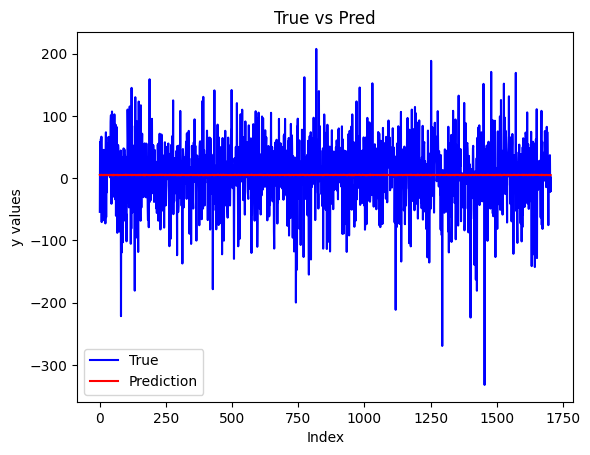

RMSE: 51.660094412026375, MAE: 38.417427464570224, R2: -0.00370749545365201
Epoch 1/10
171/171 [==============================] - 1s 4ms/step - loss: 3023.0710 - mae: 40.4381 - val_loss: 2808.1245 - val_mae: 39.1395
Epoch 2/10
171/171 [==============================] - 0s 2ms/step - loss: 3011.4194 - mae: 40.2278 - val_loss: 2796.2261 - val_mae: 38.9374
Epoch 3/10
171/171 [==============================] - 0s 2ms/step - loss: 3004.5784 - mae: 40.0578 - val_loss: 2788.5957 - val_mae: 38.7965
Epoch 4/10
171/171 [==============================] - 0s 2ms/step - loss: 2999.3032 - mae: 39.9367 - val_loss: 2783.2554 - val_mae: 38.6844
Epoch 5/10
171/171 [==============================] - 0s 2ms/step - loss: 2996.3259 - mae: 39.8507 - val_loss: 2780.3376 - val_mae: 38.6157
Epoch 6/10
171/171 [==============================] - 0s 2ms/step - loss: 2995.7129 - mae: 39.7852 - val_loss: 2778.8557 - val_mae: 38.5790
Epoch 7/10
171/171 [==============================] - 0s 2ms/step - loss: 2994.6638 

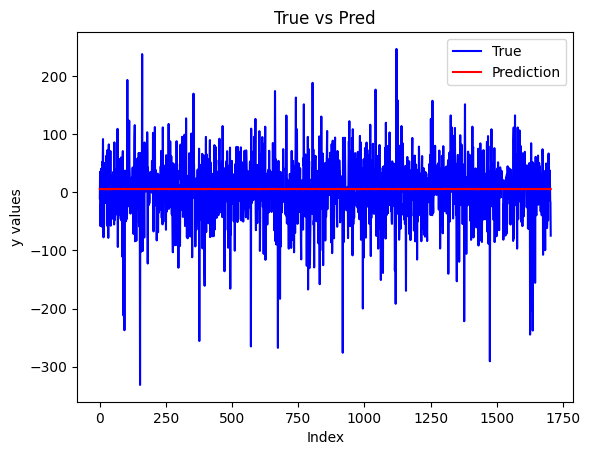

RMSE: 55.21352068659167, MAE: 39.812885479380235, R2: -0.0006083124610354318
Epoch 1/10
171/171 [==============================] - 2s 5ms/step - loss: 2947.5752 - mae: 40.0394 - val_loss: 3219.6804 - val_mae: 41.7394
Epoch 2/10
171/171 [==============================] - 1s 4ms/step - loss: 2934.1824 - mae: 39.7661 - val_loss: 3210.8093 - val_mae: 41.5203
Epoch 3/10
171/171 [==============================] - 1s 4ms/step - loss: 2926.1682 - mae: 39.5860 - val_loss: 3205.3413 - val_mae: 41.3460
Epoch 4/10
171/171 [==============================] - 1s 3ms/step - loss: 2919.6042 - mae: 39.4561 - val_loss: 3203.3408 - val_mae: 41.2559
Epoch 5/10
171/171 [==============================] - 0s 3ms/step - loss: 2917.2419 - mae: 39.3981 - val_loss: 3202.2463 - val_mae: 41.1858
Epoch 6/10
171/171 [==============================] - 0s 2ms/step - loss: 2920.3325 - mae: 39.3728 - val_loss: 3201.8816 - val_mae: 41.1514
Epoch 7/10
171/171 [==============================] - 0s 3ms/step - loss: 2915.2568

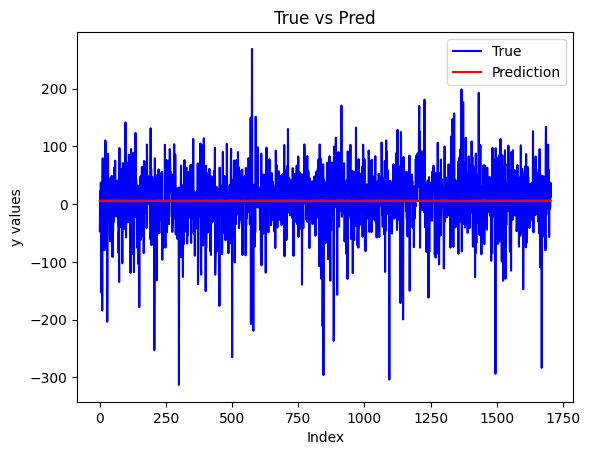

RMSE: 54.38872496753336, MAE: 39.1931863660593, R2: -0.002176485388835969
Epoch 1/10
171/171 [==============================] - 1s 3ms/step - loss: 3095.5444 - mae: 40.7602 - val_loss: 2745.2925 - val_mae: 38.0004
Epoch 2/10
171/171 [==============================] - 0s 2ms/step - loss: 3077.3271 - mae: 40.4616 - val_loss: 2733.3442 - val_mae: 37.7701
Epoch 3/10
171/171 [==============================] - 0s 3ms/step - loss: 3070.4731 - mae: 40.2998 - val_loss: 2726.6257 - val_mae: 37.6245
Epoch 4/10
171/171 [==============================] - 0s 2ms/step - loss: 3063.5261 - mae: 40.1711 - val_loss: 2722.3997 - val_mae: 37.5216
Epoch 5/10
171/171 [==============================] - 0s 3ms/step - loss: 3064.2996 - mae: 40.0911 - val_loss: 2719.9165 - val_mae: 37.4499
Epoch 6/10
171/171 [==============================] - 0s 3ms/step - loss: 3063.3132 - mae: 40.0024 - val_loss: 2719.2034 - val_mae: 37.4293
Epoch 7/10
171/171 [==============================] - 0s 2ms/step - loss: 3062.9883 - 

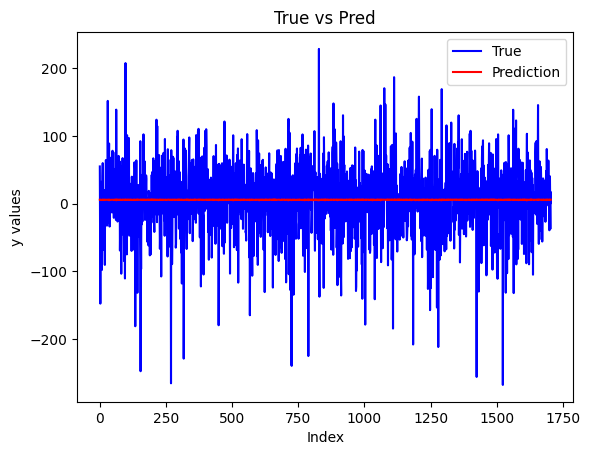

RMSE: 53.57076417257374, MAE: 39.864163712906766, R2: -0.0005175806853903175
Epoch 1/10
171/171 [==============================] - 2s 5ms/step - loss: 2965.4683 - mae: 39.9308 - val_loss: 3068.8965 - val_mae: 40.7483
Epoch 2/10
171/171 [==============================] - 1s 3ms/step - loss: 2950.6934 - mae: 39.6713 - val_loss: 3057.8032 - val_mae: 40.5151
Epoch 3/10
171/171 [==============================] - 1s 3ms/step - loss: 2942.4622 - mae: 39.4883 - val_loss: 3051.7351 - val_mae: 40.3680
Epoch 4/10
171/171 [==============================] - 1s 3ms/step - loss: 2940.2896 - mae: 39.3764 - val_loss: 3048.4746 - val_mae: 40.2734
Epoch 5/10
171/171 [==============================] - 1s 4ms/step - loss: 2939.5999 - mae: 39.3083 - val_loss: 3046.4463 - val_mae: 40.2034
Epoch 6/10
171/171 [==============================] - 1s 4ms/step - loss: 2937.6436 - mae: 39.2488 - val_loss: 3045.4219 - val_mae: 40.1648
Epoch 7/10
171/171 [==============================] - 0s 3ms/step - loss: 2934.7791

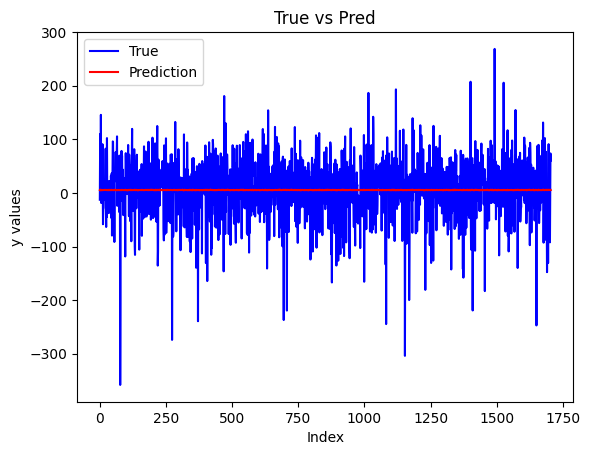

RMSE: 54.918035667396765, MAE: 40.184123408772074, R2: -0.001558729522947111
Epoch 1/10
171/171 [==============================] - 2s 3ms/step - loss: 2973.8208 - mae: 40.2266 - val_loss: 3166.9753 - val_mae: 40.5029
Epoch 2/10
171/171 [==============================] - 0s 3ms/step - loss: 2950.4929 - mae: 39.7845 - val_loss: 3161.2485 - val_mae: 40.3451
Epoch 3/10
171/171 [==============================] - 0s 3ms/step - loss: 2936.3335 - mae: 39.5729 - val_loss: 3160.2842 - val_mae: 40.2503
Epoch 4/10
171/171 [==============================] - 1s 4ms/step - loss: 2939.3049 - mae: 39.4451 - val_loss: 3161.3823 - val_mae: 40.1926
Epoch 5/10
171/171 [==============================] - 1s 4ms/step - loss: 2937.4939 - mae: 39.4078 - val_loss: 3162.5125 - val_mae: 40.1657
Epoch 6/10
171/171 [==============================] - 1s 4ms/step - loss: 2934.5090 - mae: 39.3180 - val_loss: 3163.3174 - val_mae: 40.1521
Epoch 7/10
171/171 [==============================] - 1s 4ms/step - loss: 2932.1868

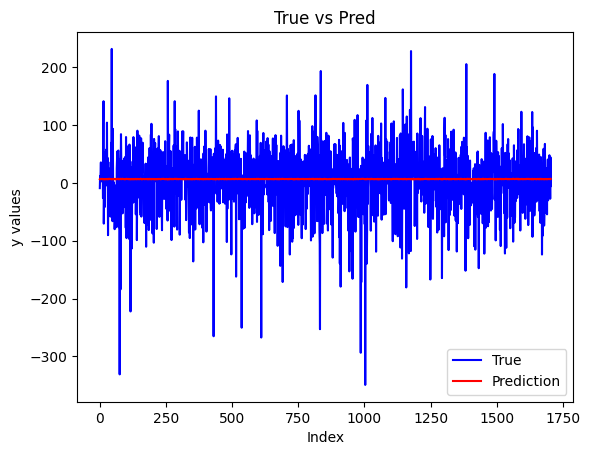

RMSE: 54.13459270228612, MAE: 39.376955417292805, R2: -0.002163953199147084
The average RMSE is 54.22805323401997


In [46]:
# Test the performance of the model on 10 different random train-test splits of MEF daily data, and report the average RMSE.
list_RMSE_train_train3=[]
list_RMSE_train_val3=[]
list_RMSE3=[]
for i in range(0,10):
  # Generate training and test data sets
  X_train, y_train, X_test, y_test = split_data(X_mef_d, y_mkt_d, 0.2, i)

  # Use X_train and y_train as MAI features and target variable
  trained_model, training_history, avg_RMSE_train, avg_RMSE_test = train_neural_network_MEF(X_train, y_train)
  print('During training of this NN model, average training RMSE is', avg_RMSE_train, ', average validation RMSE is', avg_RMSE_test)
  list_RMSE_train_train3.append(avg_RMSE_train)
  list_RMSE_train_val3.append(avg_RMSE_test)

  # Have the performance of the trained model evaluated on the test set
  MSE, MAE, R2 = test_model(trained_model, X_test, y_test)
  print(f'RMSE: {MSE**(1/2)}, MAE: {MAE}, R2: {R2}')
  list_RMSE3.append(MSE**(1/2))
avg_RMSE3=np.mean(list_RMSE3)
print('The average RMSE is', avg_RMSE3)

Text(0.5, 1.0, 'Distribution of RMSE over Iterations (MEF daily training data)')

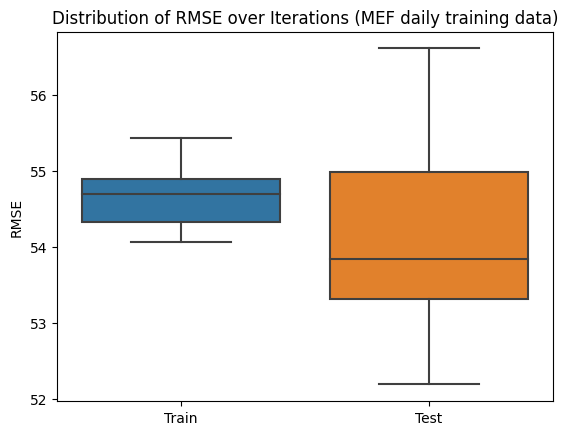

In [47]:
sns.boxplot(data=[list_RMSE_train_train3, list_RMSE_train_val3])
plt.xticks([0, 1], ['Train', 'Test'])
plt.ylabel('RMSE')
plt.title('Distribution of RMSE over Iterations (MEF daily training data)')